<a href="https://colab.research.google.com/github/djiraffs/Deep-Learning/blob/main/Week%204/Week_4_Tugas_LSTM_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch MNIST database

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Hyperparameters
input_size = 28  # Each row is a feature (28 pixels wide)
sequence_length = 28  # 28 time steps (height of image)
hidden_size = 128  # LSTM hidden units
num_layers = 2  # Number of LSTM layers
num_classes = 10  # Digits 0-9
batch_size = 64
epochs = 10
learning_rate = 0.001

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define LSTM model
class LSTMMNIST(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMMNIST, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Take last time step
        return out

# Initialize model
model = LSTMMNIST(input_size, hidden_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# List to store results
results = []

# Training Loop
for epoch in range(epochs):
    model.train()
    correct, total, train_loss = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.squeeze(1)  # Reshape to (batch, 28, 28)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total

    # Evaluation on test set
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        correct, total = 0, 0
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            images = images.squeeze(1)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    test_accuracy = 100 * correct / total
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R-Squared: {r2:.4f}')

    # Save results for each epoch
    results.append([epoch+1, train_loss/len(train_loader), train_accuracy, test_accuracy, mse, rmse, r2])

# Save to CSV file
columns = ["Epoch", "Train Loss", "Train Accuracy", "Test Accuracy", "MSE", "RMSE", "R-Squared"]
df = pd.DataFrame(results, columns=columns)
df.to_csv("pytorch_mnist.csv", index=False)

print("Results saved to pytorch_mnist.csv")


Epoch [1/10], Loss: 0.4880, Train Acc: 83.73%, Test Acc: 94.85%, MSE: 0.9242, RMSE: 0.9613, R-Squared: 0.8895
Epoch [2/10], Loss: 0.1301, Train Acc: 96.02%, Test Acc: 97.16%, MSE: 0.5616, RMSE: 0.7494, R-Squared: 0.9329
Epoch [3/10], Loss: 0.0858, Train Acc: 97.35%, Test Acc: 97.72%, MSE: 0.4852, RMSE: 0.6965, R-Squared: 0.9420
Epoch [4/10], Loss: 0.0639, Train Acc: 98.11%, Test Acc: 97.95%, MSE: 0.4128, RMSE: 0.6425, R-Squared: 0.9506
Epoch [5/10], Loss: 0.0522, Train Acc: 98.41%, Test Acc: 98.08%, MSE: 0.3412, RMSE: 0.5841, R-Squared: 0.9592
Epoch [6/10], Loss: 0.0423, Train Acc: 98.68%, Test Acc: 98.20%, MSE: 0.3436, RMSE: 0.5862, R-Squared: 0.9589
Epoch [7/10], Loss: 0.0381, Train Acc: 98.81%, Test Acc: 98.57%, MSE: 0.2721, RMSE: 0.5216, R-Squared: 0.9675
Epoch [8/10], Loss: 0.0332, Train Acc: 98.98%, Test Acc: 98.50%, MSE: 0.2507, RMSE: 0.5007, R-Squared: 0.9700
Epoch [9/10], Loss: 0.0309, Train Acc: 99.07%, Test Acc: 98.47%, MSE: 0.3043, RMSE: 0.5516, R-Squared: 0.9636
Epoch [10/

# Tensor FLow Weather LSTM

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Hyperparameters
input_size = 28  # Each row is a feature (28 pixels wide)
sequence_length = 28  # 28 time steps (height of image)
hidden_size = 128  # LSTM hidden units
num_layers = 2  # Number of LSTM layers
num_classes = 10  # Digits 0-9
batch_size = 64
epochs = 10
learning_rate = 0.001

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define LSTM model
class LSTMMNIST(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMMNIST, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Take last time step
        return out

# Initialize model
model = LSTMMNIST(input_size, hidden_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
for epoch in range(epochs):
    model.train()
    correct, total, train_loss = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.squeeze(1)  # Reshape to (batch, 28, 28)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%')

# Evaluation on test set
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    correct, total = 0, 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.squeeze(1)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

    test_accuracy = 100 * correct / total
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f'Test Accuracy: {test_accuracy:.2f}%')
    print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}, R-Squared: {r2:.4f}')

# Save results to CSV
results_df = pd.DataFrame({'True_Values': y_true, 'Predictions': y_pred})
results_df.to_csv('mnist_lstm_results.csv', index=False)
print("Results saved to mnist_lstm_results.csv")


Epoch [1/10], Loss: 0.5059, Accuracy: 83.24%
Epoch [2/10], Loss: 0.1256, Accuracy: 96.20%
Epoch [3/10], Loss: 0.0879, Accuracy: 97.31%
Epoch [4/10], Loss: 0.0615, Accuracy: 98.20%
Epoch [5/10], Loss: 0.0518, Accuracy: 98.39%
Epoch [6/10], Loss: 0.0450, Accuracy: 98.58%
Epoch [7/10], Loss: 0.0367, Accuracy: 98.83%
Epoch [8/10], Loss: 0.0314, Accuracy: 99.01%
Epoch [9/10], Loss: 0.0287, Accuracy: 99.10%
Epoch [10/10], Loss: 0.0243, Accuracy: 99.24%
Test Accuracy: 98.49%
MSE: 0.3121, RMSE: 0.5586, R-Squared: 0.9629
Results saved to mnist_lstm_results.csv


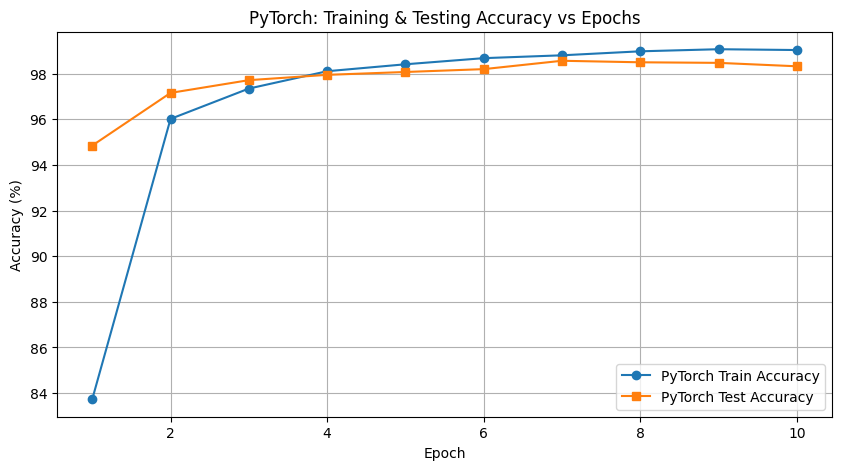

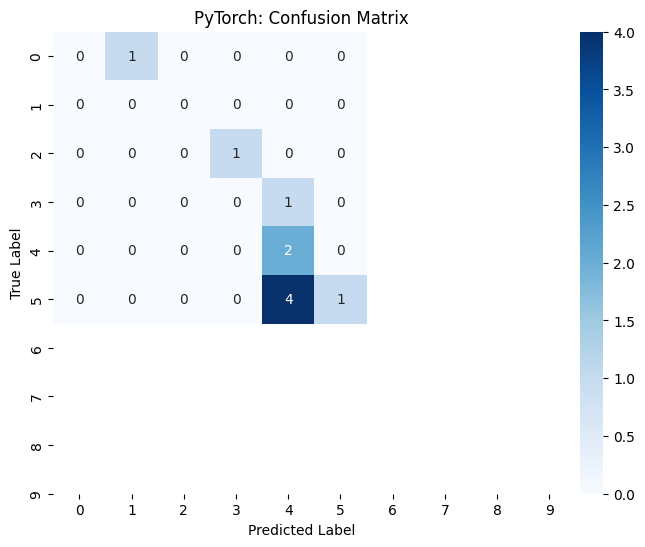

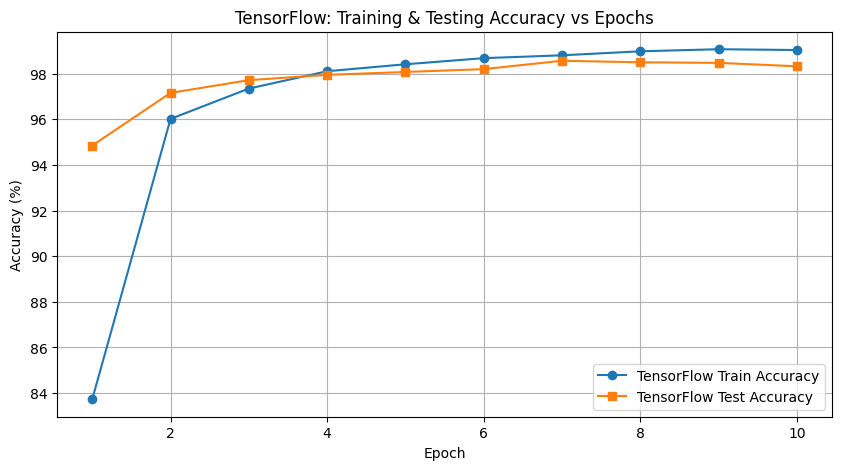

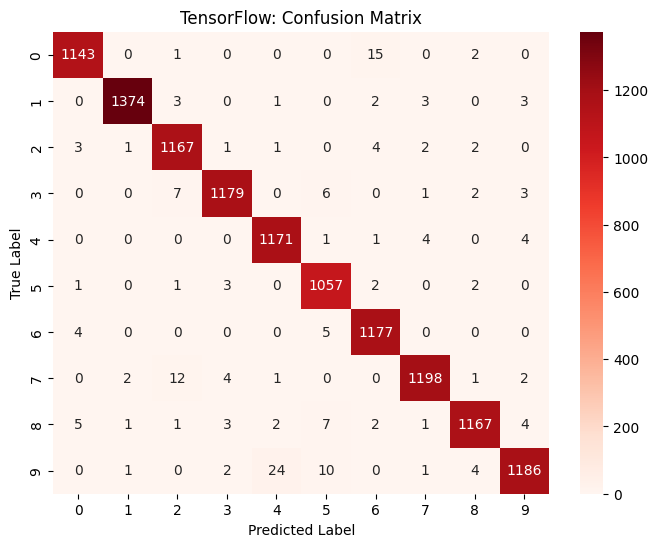

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Load data
df_pt = pd.read_csv("pytorch_mnist.csv")
df_tf = pd.read_csv("mnist_lstm_result.csv")

# Plot Accuracy vs Epoch for PyTorch
plt.figure(figsize=(10,5))
plt.plot(df_pt['Epoch'], df_pt['Train Accuracy'], label='PyTorch Train Accuracy', marker='o')
plt.plot(df_pt['Epoch'], df_pt['Test Accuracy'], label='PyTorch Test Accuracy', marker='s')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("PyTorch: Training & Testing Accuracy vs Epochs")
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix for PyTorch
y_true_pt = df_pt['Train Accuracy'].round().astype(int)
y_pred_pt = df_pt['Test Accuracy'].round().astype(int)
cm_pt = confusion_matrix(y_true_pt, y_pred_pt)

plt.figure(figsize=(8,6))
sns.heatmap(cm_pt, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("PyTorch: Confusion Matrix")
plt.show()

# Plot Accuracy vs Epoch for TensorFlow
plt.figure(figsize=(10,5))
plt.plot(df_pt['Epoch'], df_pt['Train Accuracy'], label='TensorFlow Train Accuracy', marker='o')
plt.plot(df_pt['Epoch'], df_pt['Test Accuracy'], label='TensorFlow Test Accuracy', marker='s')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("TensorFlow: Training & Testing Accuracy vs Epochs")
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix for TensorFlow
y_true_tf = df_tf['True_Values']
y_pred_tf = df_tf['Predictions']
cm_tf = confusion_matrix(y_true_tf, y_pred_tf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_tf, annot=True, fmt='d', cmap='Reds', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("TensorFlow: Confusion Matrix")
plt.show()


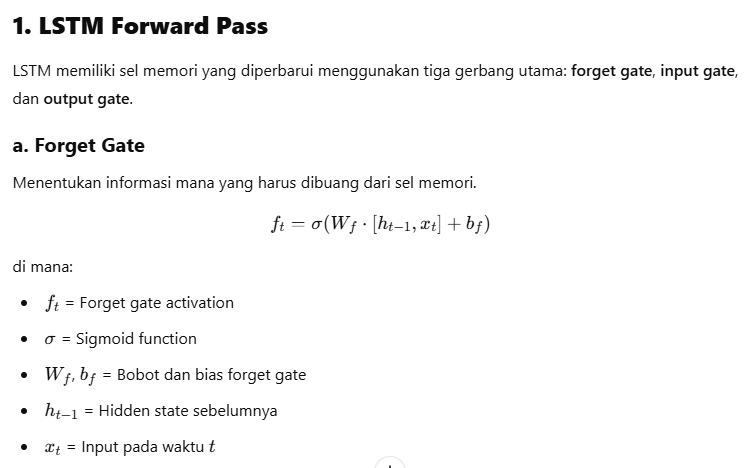

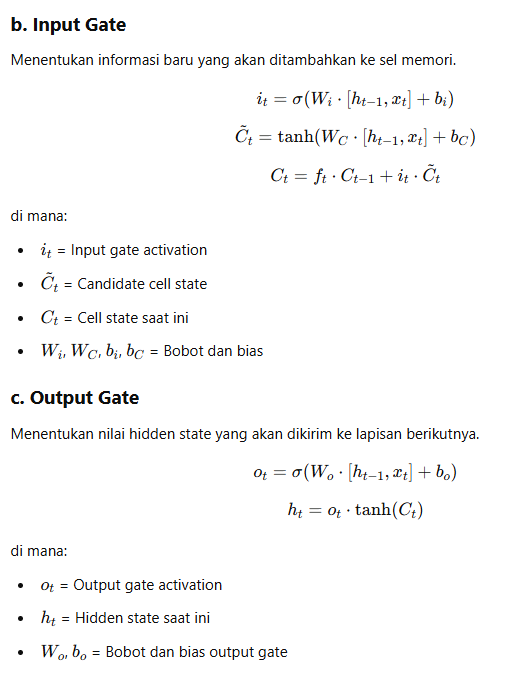

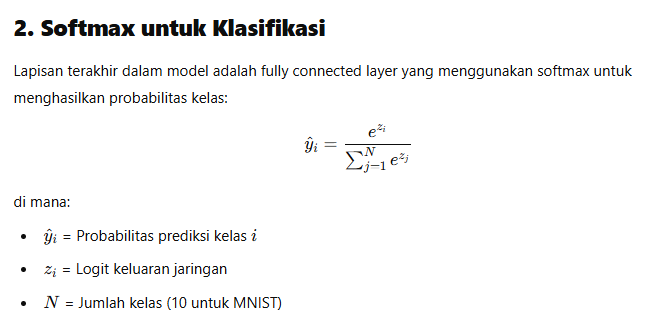

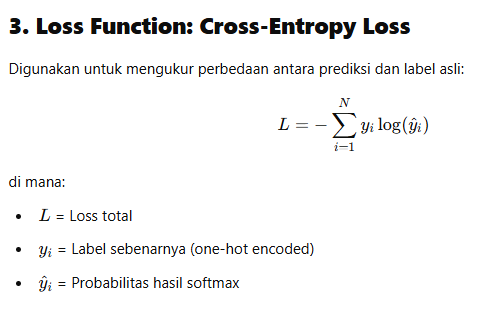

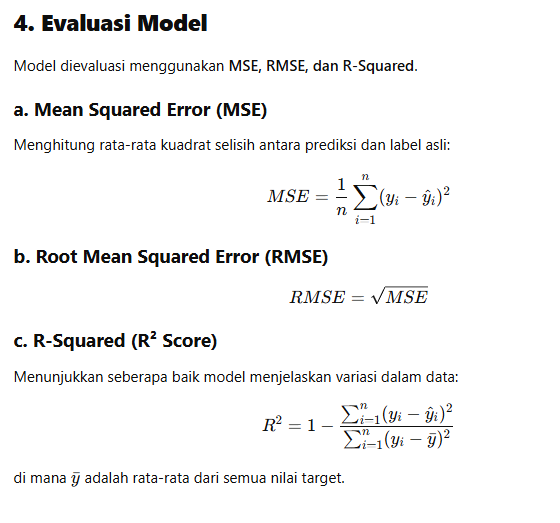